In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # 1/m->mean  (y-y(bar))->error   -> 1/m summation (y-y(bar))^2
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# extracting the data
boston=load_boston()

# keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [58]:
# EDA
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
# Creating input features and target variable
X = boston.data
y = boston.target

# printing the shapes
print('X matrix dimensionality : ', X.shape)
print('y matrix dimensionality : ', y.shape)

X matrix dimensionality :  (506, 13)
y matrix dimensionality :  (506,)


In [60]:
# creating a dataframe
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
# Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3) # order in which random values are selected

In [62]:
# Confirming whether train test split is performed properly or not
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(506,)
(404, 13)
(102, 13)
(404,)
(102,)


In [63]:
# finding the optimal value of k
# empty list
rmse_val = []
for K in range(1,20):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K, 'is : ', error)  # rmse-> root mean squared error. lesser better

RMSE value for k =  1 is :  7.094453785162316
RMSE value for k =  2 is :  7.0046098266448364
RMSE value for k =  3 is :  6.2476827948456926
RMSE value for k =  4 is :  6.202087923259644
RMSE value for k =  5 is :  6.547936660491144
RMSE value for k =  6 is :  6.369605453899339
RMSE value for k =  7 is :  6.587745544307447
RMSE value for k =  8 is :  6.622464484282889
RMSE value for k =  9 is :  6.8048624874963615
RMSE value for k =  10 is :  6.691288600654951
RMSE value for k =  11 is :  6.9010623913506635
RMSE value for k =  12 is :  6.992192482973723
RMSE value for k =  13 is :  7.054449487414579
RMSE value for k =  14 is :  7.114209358032413
RMSE value for k =  15 is :  7.135040874365548
RMSE value for k =  16 is :  7.290025848299342
RMSE value for k =  17 is :  7.395121392407306
RMSE value for k =  18 is :  7.427042080587123
RMSE value for k =  19 is :  7.467333563973561


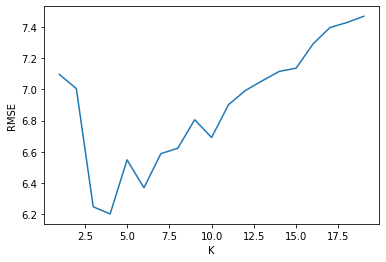

In [65]:
# plot
k_range = range(1,20)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [67]:
# optimal model
model=KNeighborsRegressor(n_neighbors=4)

# fitting the model
model.fit(X_train,y_train)

# predicting from the model
y_pred=model.predict(X_test)

# Error
error=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : ",error)

RMSE :  6.202087923259644
